# Estadística - Clase Práctica 1
### Tema: Estadistica descriptiva y estimación.

El Premio Nobel es un galardón internacional administrado por la Fundación Nobel en Estocolmo, Suecia, y está basado en la fortuna de Alfred Nobel, un inventor, ingeniero e industrial sueco. En 1968, el Sveriges Riksbank estableció el Premio del Banco de Suecia en Ciencias Económicas en memoria de Alfred Nobel, fundador del Premio Nobel.

Entre 1901 y 2023, los Premios Nobel y el Premio del Banco de Suecia en Ciencias Económicas en memoria de Alfred Nobel se otorgaron 621 veces a 1,000 personas y organizaciones. Algunos han recibido el Premio Nobel más de una vez, lo que hace un total de 965 individuos y 27 organizaciones.

Adjunto a este archivo se provee el archivo ```nobel_laureates_data.csv``` con los datos anteriormente descritos, y ```cp1.pdf```, el documento con las orientaciones de la clase práctica.




#### Requerimientos

Asegúrate de cargar las bibliotecas necesarias antes de comenzar. Puedes completar el código o los pasos faltantes según se indique.

In [1]:
# Bibliotecas necesarias
import numpy as np # Para realizar cálculos estadísticos.
from scipy.stats import norm # Para realizar cálculos estadísticos.
import matplotlib.pyplot as plt # Para visualizar distribuciones y análisis gráficos.
import pandas as pd # Para cargar y manipular los datos.
import re # Para trabajar con expresiones regulares

#### Cargar los datos
Primero, utilizaremos **Pandas** para cargar el conjunto de datos en un DataFrame. Este paso es crucial para acceder a la información y explorar las primeras filas del conjunto de datos para entender su estructura.

In [2]:
nobel = pd.read_csv("nobel_laureates_data.csv")
nobel.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [3]:
nobel.describe()

,year,prizeShare,laureateID
count,1000.000000,1000.000000,1000.000000
mean,1973.721000,2.027000,509.099000
std,34.523195,0.944014,298.130617
min,1901.000000,1.000000,1.000000
25%,1949.750000,1.000000,250.750000
50%,1979.000000,2.000000,500.500000
75%,2003.000000,3.000000,764.250000
max,2023.000000,4.000000,1034.000000


In [4]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 1000 non-null   int64 
 1   category             1000 non-null   object
 2   motivation           1000 non-null   object
 3   prizeShare           1000 non-null   int64 
 4   laureateID           1000 non-null   int64 
 5   fullName             1000 non-null   object
 6   gender               1000 non-null   object
 7   born                 1000 non-null   object
 8   bornCountry          970 non-null    object
 9   bornCity             966 non-null    object
 10  died                 970 non-null    object
 11  diedCountry          652 non-null    object
 12  diedCity             646 non-null    object
 13  organizationName     736 non-null    object
 14  organizationCountry  733 non-null    object
 15  organizationCity     731 non-null    object
dtypes: int6

#### Pregunta 1:

Entre las variables presentes en el conjunto de datos, se encuentra el género (gender).
Esta variable categórica toma valores female femenino, male masculino, y org para las
organizaciones galardonadas:

a. Genere un gráfico de barras para esta variable.

Utilizaremos **Matplotlib** para representar visualmente la distribución de género en el conjunto de datos de los galardonados.

In [16]:
gender_counts = nobel.groupby("gender")["gender"].agg('count')
gender_counts

gender
female     65
male      905
org        30
Name: gender, dtype: int64

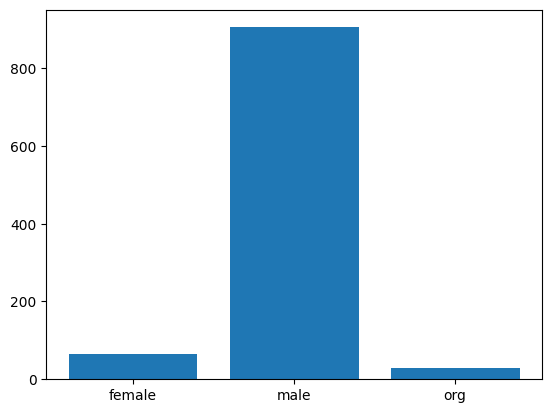

65

In [17]:
plt.bar(gender_counts.index, gender_counts.values)
plt.show()
gender_counts['female']

b. Compute la estimación puntual de la proporción de todas las mujeres ganadoras de un nobel, así como su varianza. ¿Son estas buenas estimaciones para la proporción de mujeres a nivel mundial?¿Por qué?

In [18]:
mean_estimator = gender_counts['female']/ gender_counts.sum()
mean_estimator

0.065

In [19]:
variance_estimator = mean_estimator*(1-mean_estimator)/gender_counts.sum()
variance_estimator

6.0775e-05

c. Construya un intervalo de confianza del 90 % para la proporción antes calculada.

Recordemos que el intervalo de confianza para una proporción se calcula
$$P(A) \in [ \hat{p} - \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}Z_{1 - \frac{\alpha}{2}} ; \hat{p} + \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}Z_{1 - \frac{\alpha}{2}}]$$

In [25]:
alpha = 0.1
n = gender_counts.sum()
Z = norm.ppf( 1-alpha/2 )
sq = np.sqrt(variance_estimator)
lower_bound = mean_estimator - sq*Z
upper_bound = mean_estimator + sq*Z



In [26]:
print(lower_bound)
print(upper_bound)

0.052176997098080005
0.07782300290192


#### Pregunta 2
En el conjunto de datos se tienen las variables ```born``` que especifica la fecha de nacimiento
de los individuos, y ```year``` el año en que fue galardonado.

a. Use estas variables para generar una nueva, ```age```, la edad del individuo en el momento
en que fue premiado.

**Nota** : Se provee la función ```extract_year``` para apoyar la limpieza de datos haciendo uso de expresiones regulares.

In [31]:
def extract_year(s):
    m = re.search(r'(\d{4})', s)
    return int(m.group(1)) if m else pd.NA

In [37]:

nobel['born_year'] = nobel['born'].apply(extract_year)
nobel['year'] = nobel['year'].astype(int)
nobel['age'] = nobel['year'] - nobel['born_year']
# nobel['age'] = nobel['year'] - extract_year(nobel['born'])
nobel.info()
print(nobel)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 1000 non-null   int32 
 1   category             1000 non-null   object
 2   motivation           1000 non-null   object
 3   prizeShare           1000 non-null   int64 
 4   laureateID           1000 non-null   int64 
 5   fullName             1000 non-null   object
 6   gender               1000 non-null   object
 7   born                 1000 non-null   object
 8   bornCountry          970 non-null    object
 9   bornCity             966 non-null    object
 10  died                 970 non-null    object
 11  diedCountry          652 non-null    object
 12  diedCity             646 non-null    object
 13  organizationName     736 non-null    object
 14  organizationCountry  733 non-null    object
 15  organizationCity     731 non-null    object
 16  born_ye

b. Genere un gráfico de cajas y bigotes para la nueva variable. ¿Qué significan los
puntos al exterior de los bigotes?

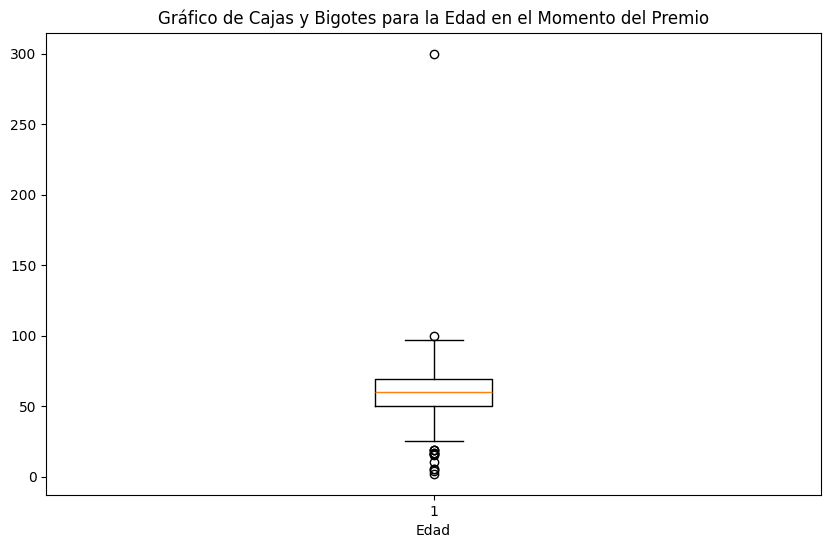

In [39]:
plt.figure(figsize=(10, 6))
plt.boxplot(x=nobel['age'])
plt.title('Gráfico de Cajas y Bigotes para la Edad en el Momento del Premio')
plt.xlabel('Edad')
plt.show()

c. Escriba el código para eliminar los datos los puntos observados en el inciso anterior.

**Nota**: Recordemos que las lineas más exteriores de un boxplot se llaman barreras (límites). Para calcularlas es necesario:
 1. Calcular los Cuartiles 1 (Q1) y 3 (Q3).
 2. Calcular el rango intercuartílico ($IQR$) como la diferencia de $Q_3 - Q_1$.
 3. Calcular Limite Superior $L_S =  Q_3 + IQR * 1.5$.
 4. Calcular Limite Superior $L_I =  Q_1 - IQR * 1.5$.

Grafiquemos de nuevo con cajas y bigotes el conjunto de datos resultante.


d. Genere un histograma para la variable ```age``` (filtrada). ¿Qué distribución parece seguir la variable?

#### Pregunta 3
Asumiendo que la variable creada age es normalmente distribuida:

a. Estime los parámetros de la distribución, maximizando la verosimilitud.